In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm


In [2]:
relationship_mtx = pd.read_csv('../data/raw/Wedding Guest Network Data - Connection Matrix.csv', index_col=0)
constraint_mtx = pd.read_csv('../data/raw/Wedding Guest Network Data - Seating Constraints.csv', index_col=0)
guest_list_df = pd.read_csv('../data/raw/Wedding Guest Network Data - Guest List.csv', index_col=0)

In [3]:
relationship_mtx

,Richard Pattison,Kathryn Russell,Tim Balzer,Mac Pattison,Ali Pattison,Ella Pattison,Mary Pattison,William Pattison,Wally Pattison,Holly Pattison,...,Alice McIntosh,Daniel Cohen,Sean Martin,Nefeli Chondrogianni,Sean Neel,Jenny Falberg,Pat Jr. Pattison,Morgan Pattison,MC Davault,Ryan Hurley
Richard Pattison,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0,1.0
Kathryn Russell,3.0,NaN,3.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,3.0,1.0
Tim Balzer,3.0,3.0,NaN,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,3.0,1.0
Mac Pattison,3.0,1.0,1.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
Ali Pattison,3.0,1.0,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jenny Falberg,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0,0.0,0.0
Pat Jr. Pattison,3.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,0.0,0.0
Morgan Pattison,2.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0
MC Davault,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [4]:
constraint_mtx.fillna(0, inplace=True)

In [5]:
all(constraint_mtx.columns == relationship_mtx.columns) and all(constraint_mtx.index == relationship_mtx.index) and all(constraint_mtx.index == constraint_mtx.columns)

True

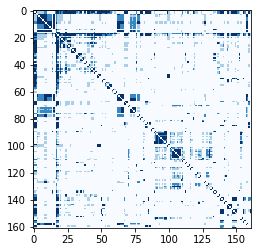

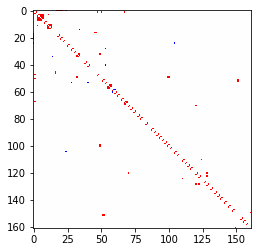

In [6]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.imshow(relationship_mtx.values, cmap='Blues', interpolation='nearest')
plt.show()

plt.imshow(constraint_mtx.values, cmap='bwr', interpolation='nearest')
plt.show()

In [7]:
relationship_mtx.sum(axis=0).sort_values(ascending=False)[:50]

Mary Balzer            341.0
Richard Pattison       279.0
Max Balzer             224.0
Kathryn Russell        221.0
Tim Balzer             209.0
Holly Pattison         121.0
Wally Pattison         115.0
Genevieve Geoghan      108.0
Mac Pattison            93.0
Maggie Dunn             79.0
Mary Grace Pattison     76.0
Ali Pattison            74.0
Oscar Nordness          73.0
William Pattison        71.0
Mary Pattison           71.0
Ella Pattison           71.0
Pat Jr. Pattison        70.0
Marie Pattison          68.0
Pat Pattison            68.0
James Rogers            67.0
Suzie Campen            63.0
Tim Campen              63.0
Molly Bammerlin         61.0
Cody Vild               60.0
Daryl Bammerlin         60.0
Morgan Pattison         60.0
Sloane Fowkes           60.0
Judy Bell               60.0
Christie Ranges         59.0
Harper Bammerlin        58.0
Olivia Bammerlin        58.0
Debbie Roper            57.0
Angelo Morales          56.0
Bonnie Neel             56.0
Murd Neel     

In [8]:
relationship_mtx.sum(axis=0).sort_values(ascending=False)[-50:]

Lindsay Coolidge        27.0
Rick Strauss            27.0
Fanny Patriksson        26.0
Andres Cifuentes        26.0
Troy Nguyen             26.0
Toni Hepburn            26.0
Natalie Kanshanchi      26.0
Sam Ingraffia           26.0
Jacques Sisteron        26.0
Jeff Thompson           25.0
Cameron Berkowitz       25.0
Kaitlin Olson           25.0
Johan Ahlgren           24.0
Sam Waring              24.0
Claire Meunier          24.0
Maggie McGinley         24.0
Anneli Ahlgren          24.0
Hamideh Soltanzadeh     23.0
Charlie Coolidge        22.0
Kendra Ruth             22.0
Sam Nicholson           22.0
Jukka Aromaa            21.0
Daniel Cohen            21.0
Paul Davault            21.0
Cara Touretzky          21.0
Jenny Falberg           21.0
Bob Olson               20.0
Ryan Hurley             20.0
Tori Bultman            20.0
John Mazza              19.0
Molly Hamrick           18.0
Aaron Hoogstraten       17.0
Mallory Chandler        16.0
Megan Kesselman         15.0
Caroline Cooli

In [9]:
guest_list = relationship_mtx.index.values.tolist()

In [10]:
len(guest_list)

161

In [ ]:
for g in guest_list:
    for gp in guest_list:
        if gp == g:
            continue

        if relationship_mtx.loc[g, gp] != relationship_mtx.loc[gp, g]:
            print(f"relationship: {g} with {gp} does not match {gp} with {g}")

        if constraint_mtx.loc[g, gp] != constraint_mtx.loc[gp, g]:
            print(f"constraint: {g} with {gp} does not match {gp} with {g}")

In [12]:
graph = nx.Graph(name="Wedding Guest Network")
graph.add_nodes_from(guest_list)

In [13]:
edges = []
for i, g in enumerate(guest_list):
    for gp in guest_list[i+1:]:
        w = relationship_mtx.loc[g, gp]
        if w != 0:
            edges.append((g, gp, w))

In [14]:
len(edges)

2041

In [15]:
graph.add_weighted_edges_from(edges, weight='relationship_strength')

In [16]:
between_centrality = nx.betweenness_centrality(graph, weight='relationship_strength')
clusters = nx.clustering(graph, weight='relationship_strength')
centrality = nx.eigenvector_centrality(graph, weight='relationship_strength')

In [17]:
df_analysis = pd.concat((pd.Series(between_centrality).sort_index(), pd.Series(clusters).sort_index(), pd.Series(centrality).sort_index()), axis=1, keys=['between_centrality', 'clusters', 'centrality'])
centrality_ordered = df_analysis.sort_values('centrality').index
between_centrality_ordered = df_analysis.sort_values('between_centrality').index

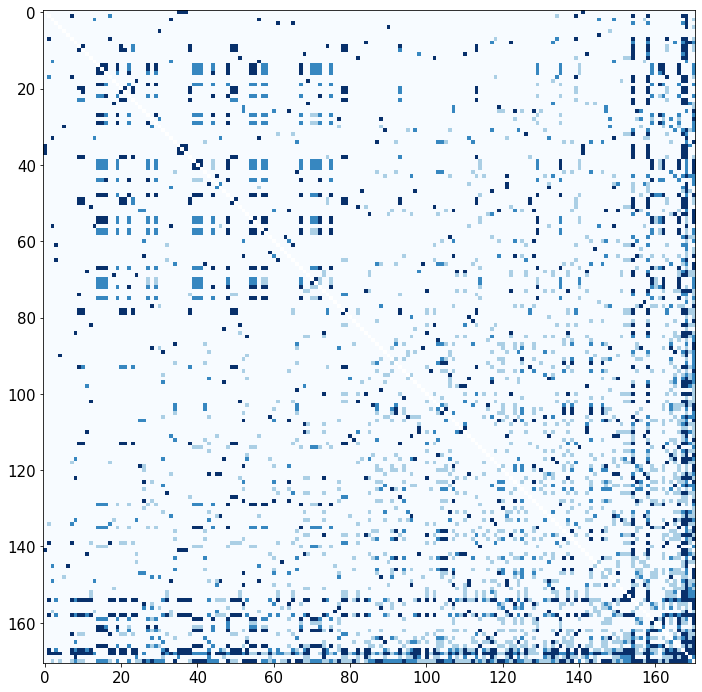

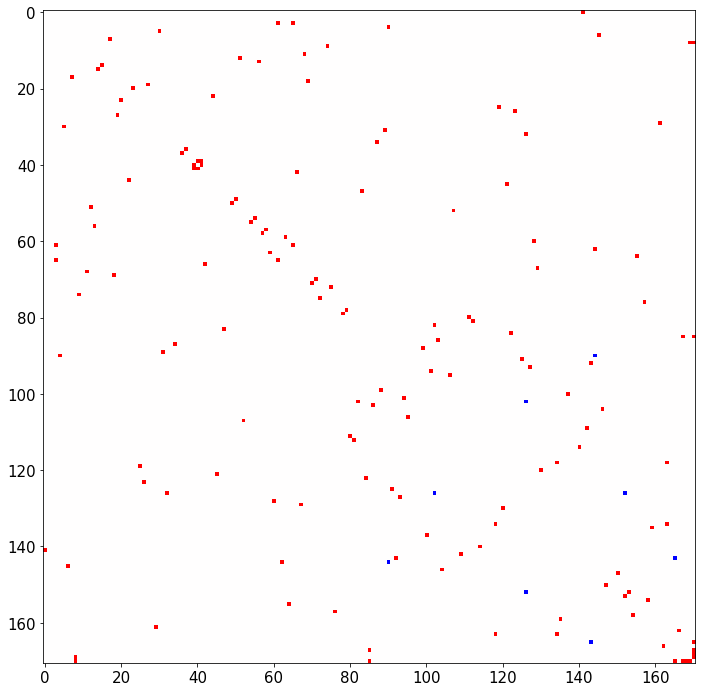

In [18]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.imshow(relationship_mtx.loc[between_centrality_ordered, between_centrality_ordered].values, cmap='Blues', interpolation='nearest')
plt.show()

plt.imshow(constraint_mtx.loc[between_centrality_ordered, between_centrality_ordered].values, cmap='bwr', interpolation='nearest')
plt.show()

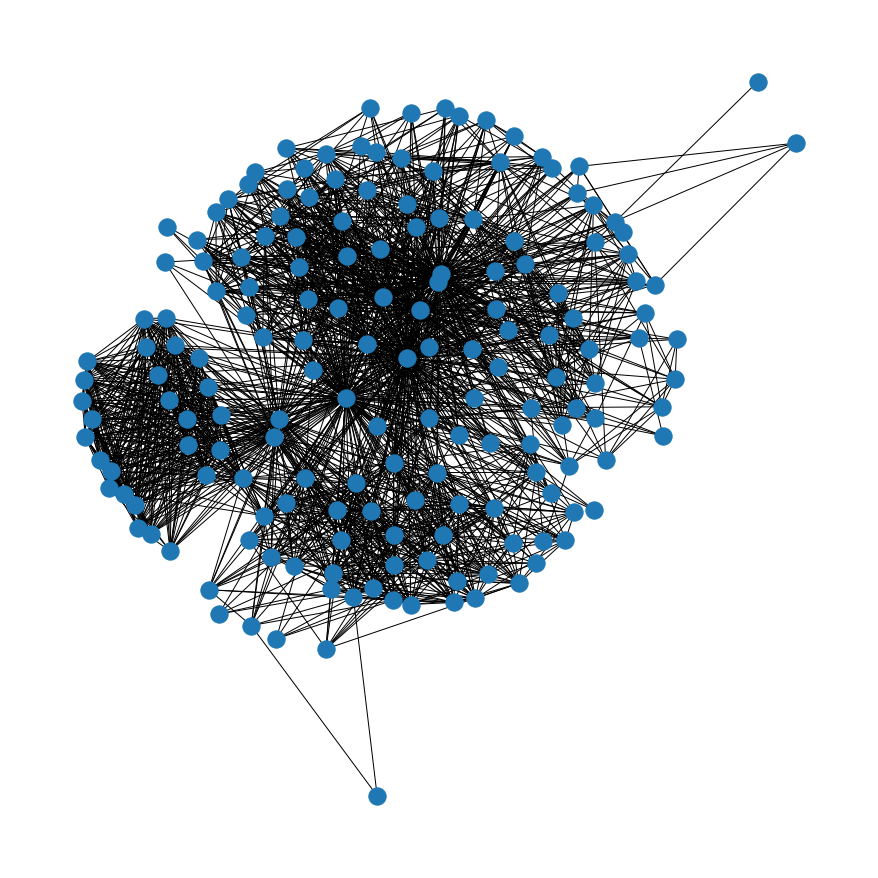

In [19]:
nx.draw(graph, nx.kamada_kawai_layout(graph))#, with_labels=True, node_size=300, node_color='blue', edge_color='black', width=1, font_size=15)

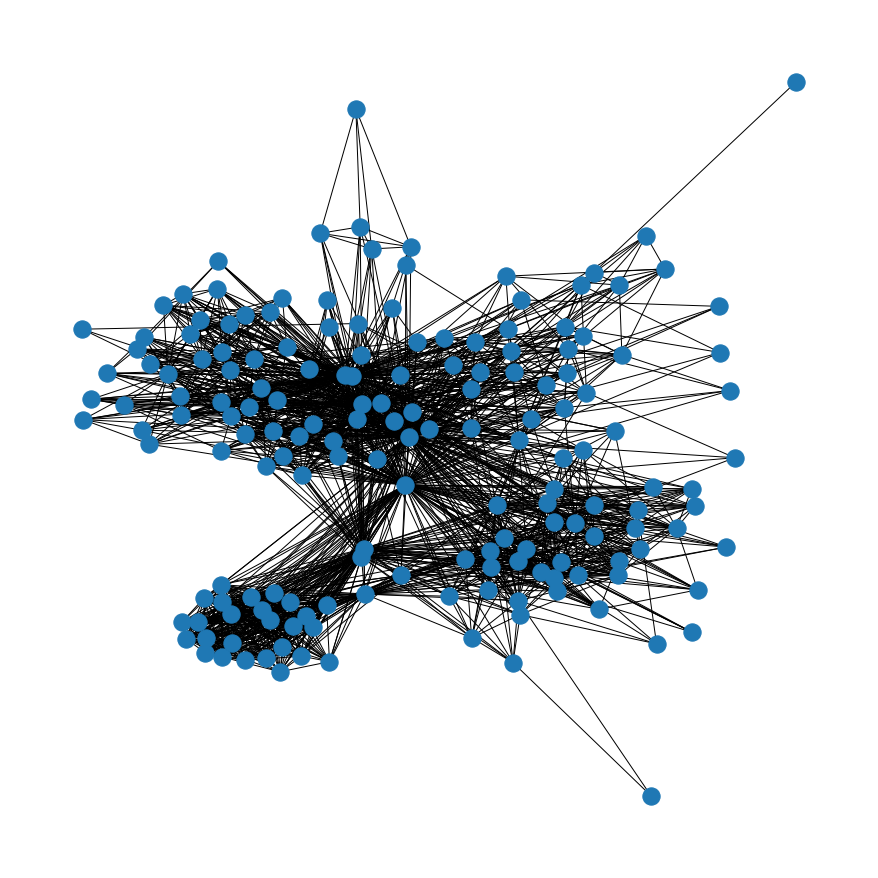

In [20]:
nx.draw(graph, nx.spring_layout(graph))

In [21]:
guest_list_df.index = guest_list

In [29]:
guest_list_df

,Last Name,Party,Phone,Email,age,relationship,Street Address 1,Street Address 2,City,State/Province,...,Wedding Ceremony and Reception - RSVP,Wedding Ceremony and Reception - Do you require a vegetarian dinner,Wedding Ceremony and Reception - Please let us know of any food allergies,Wedding Ceremony and Reception - Thank You Sent,Wedding Ceremony and Reception - Gift Received,Send a note to the couple?,Unnamed: 23,Unnamed: 24,Pattison Family,24
Richard Pattison,Pattison,Richard Pattison,4408212849,mary.a.balzer@gmail.com,34,Pattison Family,"1236 N Flores St,",401,W Hollywood,CA,...,Attending,NaN,NaN,Not Sent,NaN,NaN,NaN,NaN,Pattison Family Friend,4.0
Kathryn Russell,Russell,Kathryn Russell & Tim Balzer,323-829-4040,kathrynrussellbalzer@gmail.com,68,Balzer Family,6734 Wedgewood Place,NaN,Los Angeles,CA,...,Attending,no,NaN,Not Sent,NaN,Can't wait!!,NaN,NaN,RRSD,1.0
Tim Balzer,Balzer,Kathryn Russell & Tim Balzer,NaN,NaN,69,Balzer Family,6734 Wedgewood Place,NaN,Los Angeles,CA,...,Attending,no,NaN,Not Sent,NaN,NaN,NaN,NaN,CMU,24.0
Mac Pattison,Pattison,Pattison Family,4124002585,Mac.Pattison@gmail.com,36,Pattison Family,3800 Fallwood Lane,NaN,Fredericksburg,VA,...,Attending,no,NaN,Not Sent,NaN,Can‚Äôt wait!!,NaN,NaN,UT,7.0
Ali Pattison,Pattison,Pattison Family,NaN,NaN,40,Pattison Family,3800 Fallwood Lane,NaN,Fredericksburg,VA,...,Attending,no,NaN,Not Sent,NaN,NaN,NaN,NaN,Richard Professional,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Morgan Pattison,Pattison,NaN,NaN,NaN,46,Pattison Family,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MC Davault,Davault,NaN,NaN,NaN,70,Balzer Family,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ryan Hurley,Hurley,NaN,NaN,NaN,25,Balzer Family,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Michael Baldea,Baldea,NaN,NaN,NaN,41,Richard Professional,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
guest_list_df['age']

Richard Pattison    34
Kathryn Russell     68
Tim Balzer          69
Mac Pattison        36
Ali Pattison        40
                    ..
Morgan Pattison     46
MC Davault          70
Ryan Hurley         25
Michael Baldea      41
Guest Baldea        41
Name: age, Length: 171, dtype: int64

In [23]:
age_difference_mtx = pd.DataFrame(0, columns=guest_list, index=guest_list)

In [24]:
for g in guest_list:
    for gp in guest_list:
        age_difference_mtx.loc[g, gp] = np.abs(guest_list_df.loc[g, 'age'] - guest_list_df.loc[gp, 'age'])

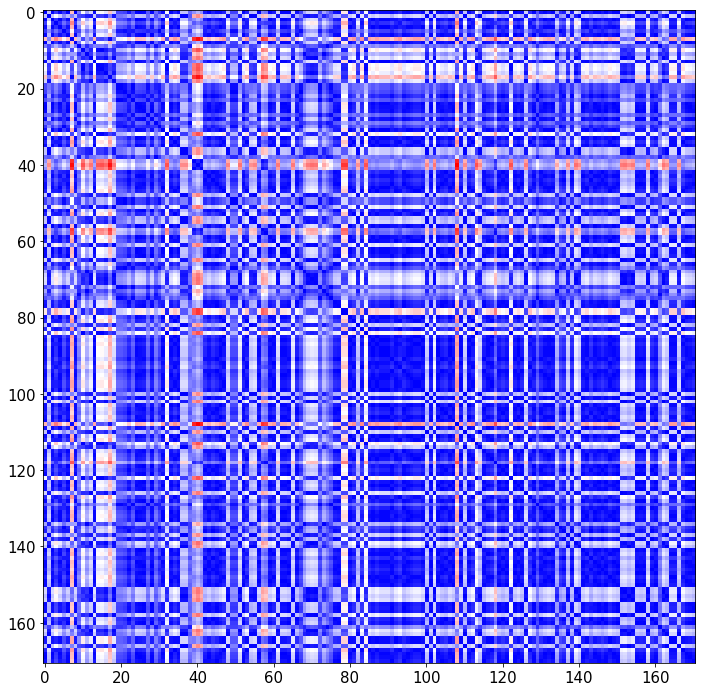

In [25]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15

plt.imshow(age_difference_mtx.loc[between_centrality_ordered, between_centrality_ordered].values, cmap='bwr', interpolation='nearest')
plt.show()